# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [100]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [101]:
#Seu código aqui
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [102]:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

# 2 - Realize a segunda etapa de pré processamento dos dados.

## A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.
Em valor de condominio e metragem, tem uma diferença muito grande entre a media e a mediana.

## B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.
Achei que seriam provaveis outliers, mas achei apenas 1 caso isolado, e opitei por excluir, outros casos são de casa com metragens grandes e valores de alugueis mais altos, provavelmente casas da alto padrão.

## C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.
Com os graficos podemos tirar o insight que temos uma demdanda maior de apartamentos com 2 quartos 1 suite e 1 vaga, podemos ver que as casas de maior padrão são minoria em nosso df.

In [103]:
#Seu código aqui
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


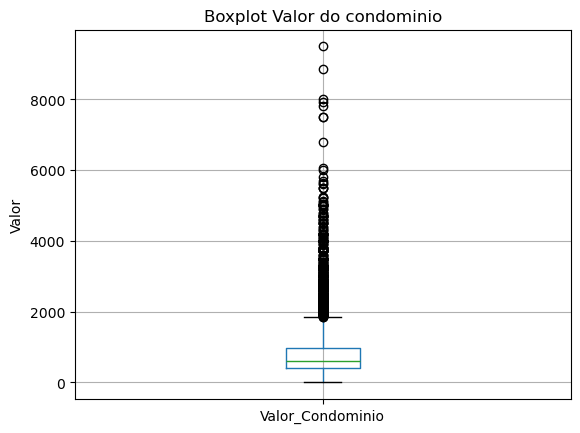

In [104]:
df.boxplot(column='Valor_Condominio')
plt.title('Boxplot Valor do condominio')
plt.ylabel('Valor')
plt.show()

In [105]:
df[df['Valor_Condominio'] > 6000]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
4893,2800,6059,66,2,2,1,1
5096,3000,7500,393,4,6,4,6
6810,8000,8860,414,4,5,4,4
6922,10000,9500,452,4,3,2,4
7109,15000,6800,456,4,5,4,5
7110,15000,8000,452,4,5,4,6
7119,15000,7928,340,3,4,3,5
7166,19900,7800,880,5,4,5,6
7198,25000,7500,627,4,5,4,6


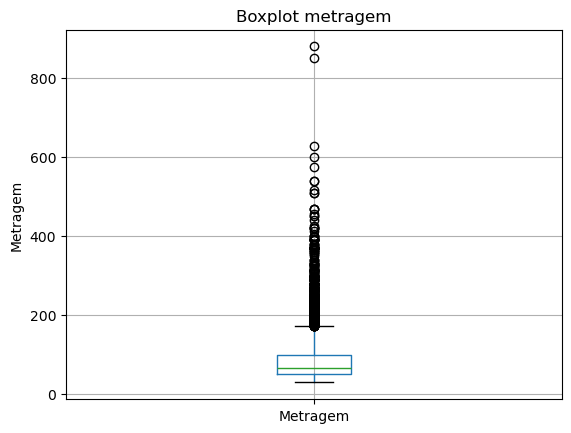

In [106]:
df.boxplot(column='Metragem')
plt.title('Boxplot metragem')
plt.ylabel('Metragem')
plt.show()

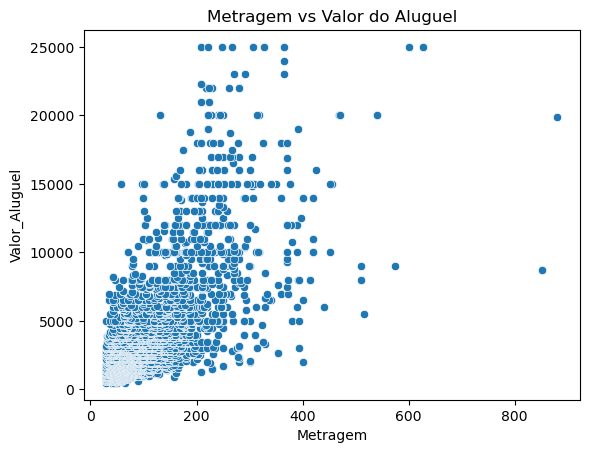

In [107]:
sns.scatterplot(data=df, x='Metragem', y='Valor_Aluguel')
plt.title('Metragem vs Valor do Aluguel')
plt.show()

In [108]:
# Exemplo: filtrar o caso que destoa
df[df['Valor_Condominio'] > 5000][['Metragem', 'Valor_Condominio']]


,Metragem,Valor_Condominio
4893,66,6059
5096,393,7500
6530,330,5250
6810,414,8860
6812,296,5116
6841,852,5040
6922,452,9500
6948,420,5096
7023,378,5251
7069,420,5200


In [109]:
df = df.drop(index=4893)

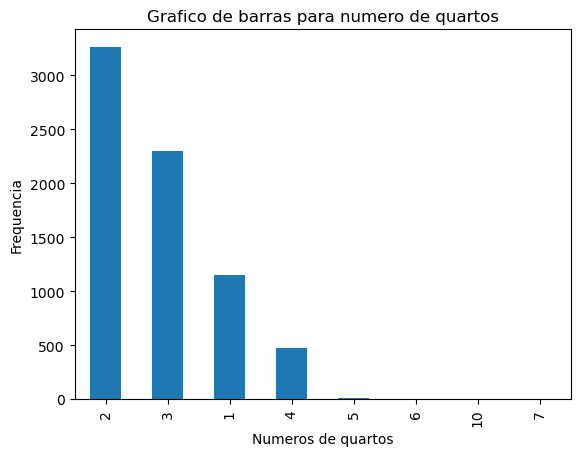

In [110]:
contagem_quartos = df['N_Quartos'].value_counts()

porcent_quarto = (contagem_quartos / contagem_quartos.sum()) * 100
ax = contagem_quartos.plot(kind='bar')
plt.title('Grafico de barras para numero de quartos')
plt.xlabel('Numeros de quartos')
plt.ylabel('Frequencia')
plt.show()

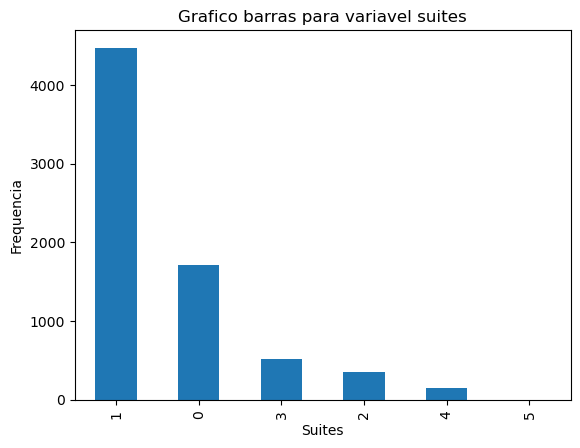

In [111]:
contagem_aluguel = df['N_Suites'].value_counts()

porcem_aluguel = (contagem_aluguel / contagem_aluguel.sum()) * 100
ax = contagem_aluguel.plot(kind='bar')
plt.title('Grafico barras para variavel suites')
plt.xlabel('Suites')
plt.ylabel('Frequencia')
plt.show()

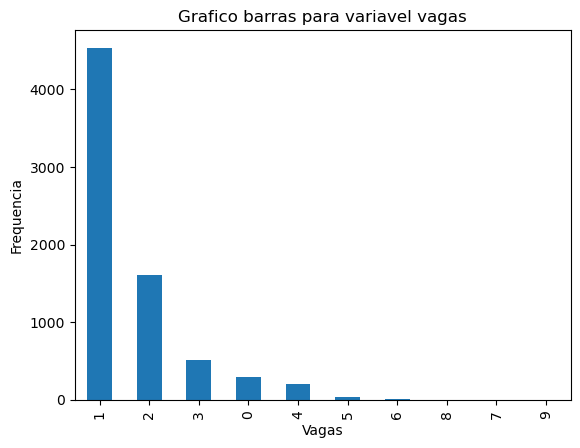

In [112]:
# grafico de barras vagas
contagem_vagas = df['N_Vagas'].value_counts()
contagem_vagas.plot(kind='bar')
plt.title('Grafico barras para variavel vagas')
plt.xlabel('Vagas')
plt.ylabel('Frequencia')
plt.show()

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

Nosso banco de dados esta bem alto a correlações
N_Suites e N_banheiros,
Valor_Condominio e Metragem,
Metragem   e   N_Vagas,
Valor_Aluguel e Metragem ,
N_Vagas  e   N_Suites,
N_Quartos e Valor_Aluguel,

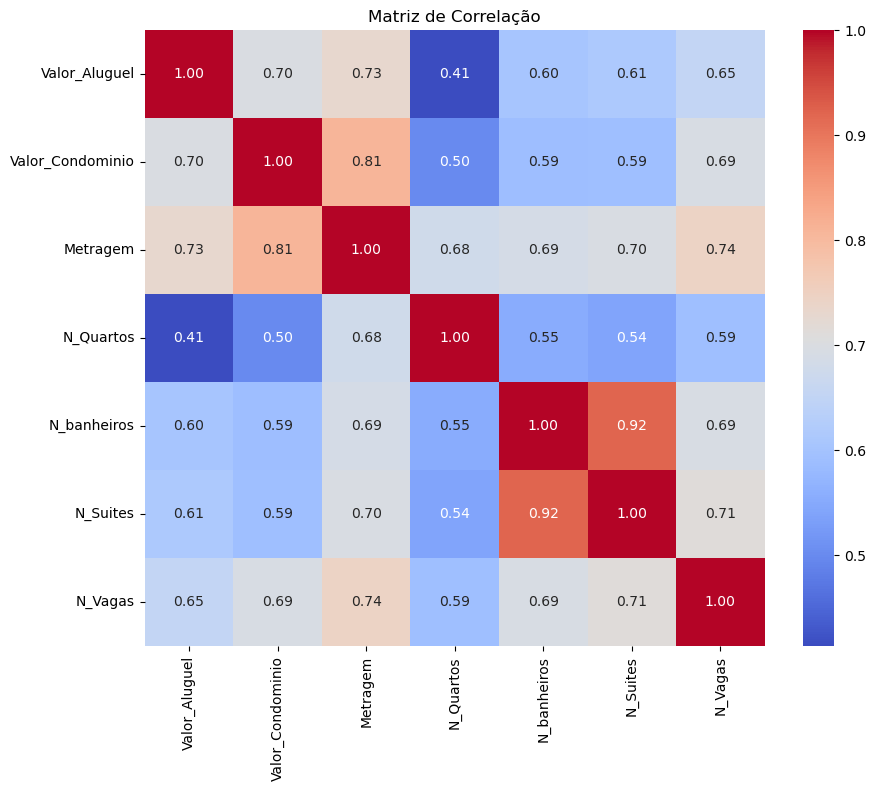

In [113]:
#Seu código aqui
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [114]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [115]:
# Seu código aqui
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [116]:
X_train

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
5986,2700,185,3,4,3,3
6698,1080,131,3,3,1,1
2208,0,32,1,2,1,1
1423,275,65,1,1,0,1
122,200,56,2,2,1,1
...,...,...,...,...,...,...
3772,450,48,2,2,1,1
5192,750,93,2,3,2,2
5227,700,40,1,2,1,1
5391,608,71,3,2,1,2


In [117]:
y_train

5986    4200
6698    7500
2208    1500
1423    1250
122      800
        ... 
3772    2000
5192    3000
5227    3000
5391    3200
860     1100
Name: Valor_Aluguel, Length: 5761, dtype: int64

In [118]:
X_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
3885,484,50,2,1,0,1
4661,680,50,2,1,0,1
1038,0,58,2,2,1,1
5868,1449,156,3,4,3,3
5100,1447,113,3,4,1,2
...,...,...,...,...,...,...
1882,587,50,2,2,1,1
911,709,70,2,2,1,1
6523,1100,184,4,4,3,3
3484,500,84,3,2,1,2


In [119]:
y_test

3885    2100
4661    2500
1038    1200
5868    4000
5100    3000
        ... 
1882    1400
911     1100
6523    6000
3484    1900
6658    7000
Name: Valor_Aluguel, Length: 1441, dtype: int64

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [120]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [121]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
model = LinearRegression()
model.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [122]:
#Seu código Aqui
intercept = model.intercept_
coef = model.coef_[0]
print(f'Intercepto: {intercept}')
print(f'Coeficiente: {coef}')

Intercepto: -80.60077415164233
Coeficiente: 34.25166967154303


Nossa equação seria:  Valor_Aluguel = -80.6 + 34.2

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [123]:
#Seu código aqui
r2 = model.score(X, y)
print(f'R²: {r2}')

R²: 0.5162582789326092


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

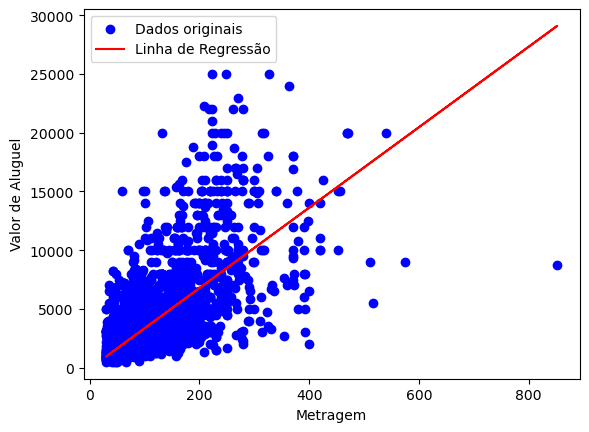

In [124]:
# Seu código aqui
plt.scatter(X, y, color='blue', label='Dados originais')
plt.plot(X, model.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor de Aluguel')
plt.legend()
plt.show()


E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [ ]:
X_test_Linear = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [ ]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = model.predict(X_test_Linear)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = model.score(X_test_Linear, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.584524869176604


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.
O R2 ficou com uma valor promoximo a 58% pois só a metragem da não da para avaliar o preço, do aluguel, muitas coisas pode influienciar em nosso modelo.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [142]:
#seu código aqui
X_multiplas = X_train
y_multiplas = y_train

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [143]:
#seu código aqui
regressao_multipla = LinearRegression()
regressao_multipla.fit(X_multiplas, y_multiplas)

LinearRegression()

In [144]:
regressao_multipla.intercept_

429.20393645714057

In [145]:
regressao_multipla.coef_

array([   0.83503174,   19.53423594, -643.65431069,  238.52382922,
        400.20126599,  477.81263852])

In [147]:
regressao_multipla.score(X_multiplas, y_multiplas)

0.5955542109175863

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [148]:
#valor de r quadrado
r2_multipla = regressao_multipla.score(X_multiplas, y_multiplas)
print(f'R² da Regressão Múltipla: {r2_multipla}')

R² da Regressão Múltipla: 0.5955542109175863


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [149]:
# aplicar o modelo nos dados de teste e trazer o r quadrado de teste
previsão = regressao_multipla.predict(X_test_multipla)

r2_multipla_test = regressao_multipla.score(X_test_multipla, y_test)
print(f'R² da Regressão Múltipla nos Dados de Teste: {r2_multipla_test}')

R² da Regressão Múltipla nos Dados de Teste: 0.6404614056767847


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

No modelo de regressão linear simples, obtivemos um R² de aproximadamente 58%. Já no modelo de regressão linear múltipla, o R² subiu para cerca de 64%. Embora o aumento pareça modesto, ele é bastante significativo, pois representa uma melhora real na capacidade do modelo de explicar a variação no valor do aluguel. Isso demonstra que a inclusão de múltiplas variáveis explicativas torna o modelo mais robusto e adequado para esse projeto, sendo claramente mais eficaz do que o uso da regressão simples baseada apenas na metragem.